In [1]:
import tensorflow_datasets as tfds
pd = tfds.core.lazy_imports.pandas

/mnt/vlm-pd/miniconda3/envs/vlm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Metadata dataframe

In [2]:
metadata_path = "gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets/downloads/manual_cc12m/00003.parquet"
metadata_df = pd.read_parquet(metadata_path)
(metadata_df['status'] == 'success').sum(), len(metadata_df)

(4416, 10000)

In [3]:
metadata_df.head()

,caption,url,key,status,error_message,width,height,original_width,original_height,exif,md5
0,London Calling - The Clash tattoo,http://static.ratemyink.com/images/ul/383/Lond...,000030005,success,None,256.0,256.0,600.0,450.0,"{""Image ImageDescription"": """", ""Image Make"": ""...",6607e945c70846bc9815558631ddcabe
1,Kidneys human organ graphic icon. Kidneys sign...,https://us.123rf.com/450wm/archivector/archive...,000030004,success,None,256.0,256.0,450.0,450.0,{},446163e0fe26a6518189d6748830fc29
2,<PERSON> pop art vector illustration. Vector i...,https://thumbs.dreamstime.com/b/afraid-girl-po...,000030001,success,None,256.0,256.0,800.0,800.0,{},1f84e41f21161c0af6629b9e78d18ed2
3,Superb Retro Style Film Stripes. An amazing 3d...,https://thumbs.dreamstime.com/b/amazing-d-illu...,000030000,success,None,256.0,256.0,800.0,450.0,{},50bc09422170ab7a662143340798373b
4,The Mill City Museum was built into the ruins ...,http://freepages.rootsweb.com/~schuckwj/family...,000030025,success,None,256.0,256.0,1175.0,881.0,"{""Image ImageWidth"": ""1175"", ""Image ImageLengt...",badc59b4fcf44ceae7c2e0ed210a7e94


In [4]:
idx = 3
caption = metadata_df['caption'][idx]
key = int(metadata_df['key'][idx])%10000
url_idx = metadata_df['url'][idx]
url_key = metadata_df.iloc[key]['url']
print(f"Caption: {caption}")
print(f"Key: {key}")
print(f"URL Idx: {url_idx}")
print(f"URL Key: {url_key}")

Caption: Superb Retro Style Film Stripes. An amazing 3d illustration of vertical film stripes with black fringes and spots. They have some blurred images placed in the royalty free illustration
Key: 0
URL Idx: https://thumbs.dreamstime.com/b/amazing-d-illustration-vertical-film-stripes-black-fringes-spots-have-some-blurred-images-placed-dark-121203102.jpg
URL Key: http://static.ratemyink.com/images/ul/383/London-Calling-The-Clash-tattoo-38346.jpeg


# Dataset

In [5]:
dataset = tfds.load("cc12m",data_dir="gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets")['train']
dataset

2024-06-20 02:41:27.272252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 02:41:28.391960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<_PrefetchDataset element_spec={'caption': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'original_height': TensorSpec(shape=(), dtype=tf.int64, name=None), 'original_width': TensorSpec(shape=(), dtype=tf.int64, name=None), 'url': TensorSpec(shape=(), dtype=tf.string, name=None)}>

2024-06-20 02:42:49.004054: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


tf.Tensor(b'Horror Fiction Books: Goosebumps and Are You Afraid of the Dark?', shape=(), dtype=string)
tf.Tensor(b'https://media.karousell.com/media/photos/products/2018/05/29/horror_fiction_books_goosebumps_and_are_you_afraid_of_the_dark_1527604031_b4798a1d.jpg', shape=(), dtype=string)
tf.Tensor(b'Sausage and Rice Casserole, add the frozen vegetables.', shape=(), dtype=string)
tf.Tensor(b'https://www.tasteofsouthern.com/wp-content/uploads/2018/02/sausage-rice-casserole_08_add-frozen-vegetables.jpg', shape=(), dtype=string)


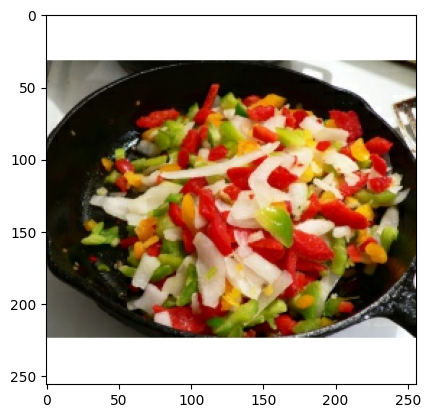

In [11]:
import matplotlib.pyplot as plt
iterator = iter(dataset)
for i in range(2):
    batch = next(iterator)
    plt.imshow(batch['image'])
    print(batch['caption'])
    print(batch['url'])